In [1]:
from linares_plot import *
import statsmodels.formula.api as smf

Load data

In [15]:
df_2_b = pd.read_excel('2_bumps_interf.xlsx')
df_1_b = pd.read_excel('1_bump_drift.xlsx')

2 bumps interference

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


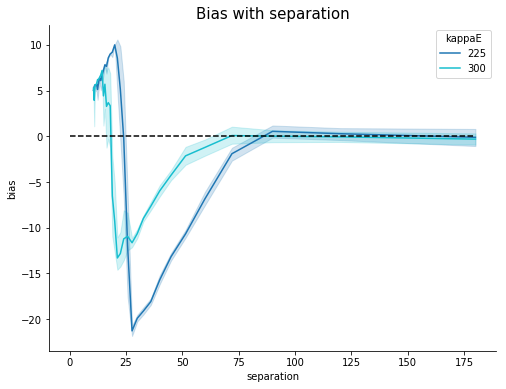

In [21]:
df = df_2_b.loc[df_2_b['success']==True] 

plt.figure(figsize=(8,6))
g = sns.lineplot( x="separation", y="bias", hue='kappas_E', ci=95 , palette='tab10', data=df, legend=False) 
plt.plot([0, max(df['separation'])], [0,0], 'k--') 
plt.title('Bias with separation', fontsize=15) #condition title
plt.gca().spines['right'].set_visible(False) #no right axis
plt.gca().spines['top'].set_visible(False) #no  top axis
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.legend(title='kappaE', loc='upper right', labels=[str(i) for i in [225, 300]] )
plt.show(block=False)


1 bump drift

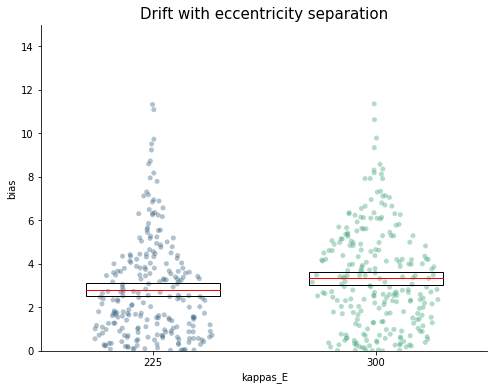

In [32]:
df1_corr = df_1_b.loc[df_1_b['success']==True] ### remove the wrong ones
df1_corr = df1_corr.loc[df1_corr['n_bumps']==1] ### keep the ones with one bump
df1_corr =df1_corr.loc[df1_corr['bias']<50] ### remove extreme cases

plt.figure(figsize=(8,6)) ## plot linares
linares_plot( x="kappas_E", y="bias", order=[225, 300],  palette='viridis', alpha=0.4, point_size=5, df=df1_corr) 
plt.title('Drift with eccentricity separation', fontsize=15) #condition title
plt.gca().spines['right'].set_visible(False) #no right axis
plt.gca().spines['top'].set_visible(False) #no  top axis
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.ylim(0, 15)
plt.show(block=False)

Liniar regress (closer to center (higer kappa_E, more drift))

In [30]:
res_m = smf.ols(formula='bias ~ kappas_E', data=df1_corr).fit()
print(res_m.summary())

                            OLS Regression Results                            
Dep. Variable:                   bias   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     6.072
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0141
Time:                        12:19:26   Log-Likelihood:                -1086.2
No. Observations:                 483   AIC:                             2176.
Df Residuals:                     481   BIC:                             2185.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2703      0.741      1.713      0.0